<a href="https://colab.research.google.com/github/Yashwanthreddy1789/machine-learning/blob/main/movie_genre_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk.corpus import stopwords

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


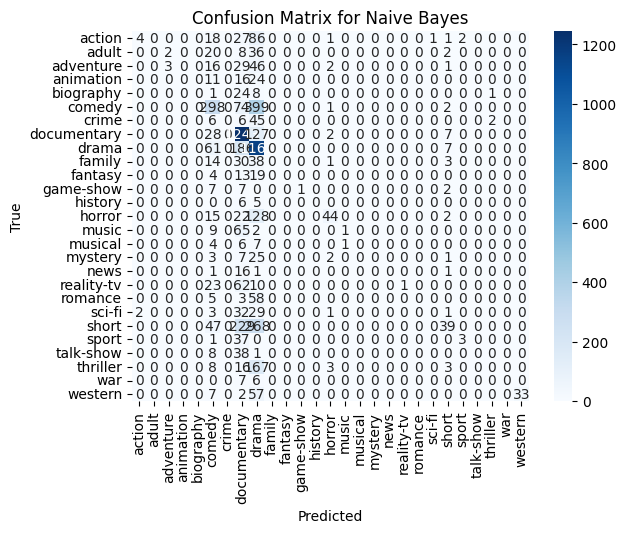

Naive Bayes Classification Report:
              precision    recall  f1-score   support

      action       0.67      0.03      0.05       140
       adult       0.00      0.00      0.00        68
   adventure       0.60      0.03      0.06        97
   animation       0.00      0.00      0.00        51
   biography       0.00      0.00      0.00        34
      comedy       0.48      0.39      0.43       774
       crime       0.00      0.00      0.00        59
 documentary       0.56      0.88      0.69      1407
       drama       0.42      0.82      0.56      1416
      family       0.00      0.00      0.00        86
     fantasy       0.00      0.00      0.00        36
   game-show       1.00      0.06      0.11        17
     history       0.00      0.00      0.00        11
      horror       0.77      0.21      0.33       211
       music       0.50      0.01      0.03        77
     musical       0.00      0.00      0.00        18
     mystery       0.00      0.00      0.00   

In [8]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to clean the text data (removing punctuation, stop words, etc.)
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    words = text.split()
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return ' '.join(words)

# Function to load and preprocess the data from the text file
def load_and_preprocess_data(file_path):
    data = []

    # Read the file and split the content by " ::: "
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                parts = line.strip().split(' ::: ')
                if len(parts) == 4:  # Ensuring we have 4 parts: ID, Title (Year), Genre, Plot Summary
                    movie_id = int(parts[0])
                    title = parts[1]
                    genre = parts[2]
                    plot_summary = parts[3]
                    data.append([title, genre, plot_summary])
            except Exception as e:
                continue  # Skip any lines that don't conform to the expected format

    # Create a DataFrame from the data
    df = pd.DataFrame(data, columns=['Title', 'Genre', 'Plot_Summary'])

    # Clean the plot summary text
    df['Cleaned_Plot'] = df['Plot_Summary'].apply(clean_text)

    return df

# Step 1: Load and Preprocess the Dataset
# Adjust 'train_data.txt' with the path to your actual file
df = load_and_preprocess_data('train_data.txt')

# Step 2: Encode the genres using LabelEncoder
le = LabelEncoder()
df['Encoded_Genre'] = le.fit_transform(df['Genre'])

# Step 3: Vectorize the Text Data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')  # Limiting vocabulary to 5000 words
X = tfidf.fit_transform(df['Cleaned_Plot'])

# Step 4: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Encoded_Genre'], test_size=0.2, random_state=42)

# Step 5: Train Models (Naive Bayes, Logistic Regression, SVM)

# Model 1: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
# Confusion Matrix for Naive Bayes
conf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# Model 2: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train, y_train)

# Model 3: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Step 6: Evaluate the Models
from sklearn.metrics import classification_report

# Modify classification report to use zero_division
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_, zero_division=0))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_, zero_division=0))

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_, zero_division=0))

# Step 7: Print Accuracy Scores
print(f"Naive Bayes Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")


In [12]:
def predict_genre(plot_summary):
    plot_summary_vector = vectorizer.transform([plot_summary])
    prediction = model.predict(plot_summary_vector)
    return prediction[0]

# Sample plot summaries for testing
test_summaries = [
    "In a post-apocalyptic world, a lone survivor must navigate through a desolate landscape while being hunted by mutated creatures and overcoming his inner demons.",
    "A young girl discovers a hidden talent for music and struggles to balance her dreams of becoming a musician with the expectations of her traditional family.",
    "Two rival gangs fight for control of the city, but when a new crime lord appears, both sides must unite to survive the chaos.",
    "After finding a mysterious artifact, a group of friends accidentally opens a portal to another dimension, unleashing unimaginable horrors.",
    "An ambitious journalist uncovers a political scandal that threatens to expose corruption at the highest levels of government."
]

# Test the model with the provided plot summaries
for summary in test_summaries:
    predicted_genre = predict_genre(summary)
    print(f"Plot Summary: {summary}")
    print(f"Predicted Genre: {predicted_genre}\n")


Plot Summary: In a post-apocalyptic world, a lone survivor must navigate through a desolate landscape while being hunted by mutated creatures and overcoming his inner demons.
Predicted Genre: drama

Plot Summary: A young girl discovers a hidden talent for music and struggles to balance her dreams of becoming a musician with the expectations of her traditional family.
Predicted Genre: drama

Plot Summary: Two rival gangs fight for control of the city, but when a new crime lord appears, both sides must unite to survive the chaos.
Predicted Genre: drama

Plot Summary: After finding a mysterious artifact, a group of friends accidentally opens a portal to another dimension, unleashing unimaginable horrors.
Predicted Genre: drama

Plot Summary: An ambitious journalist uncovers a political scandal that threatens to expose corruption at the highest levels of government.
Predicted Genre: documentary

